<a href="https://colab.research.google.com/github/JuanCarlosUNAL/Notebooks/blob/master/tf/BasicImageClasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

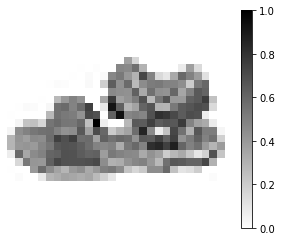

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train, x_test = x_train.reshape(-1, 28, 28 , 1)/255, x_test.reshape(-1, 28, 28 , 1)/255

sample = x_train[np.random.randint(60000)]

plt.imshow(sample.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.colorbar()
plt.show()

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (5,5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.AveragePooling2D((2,2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.AveragePooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.AveragePooling2D((2,2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 1, 1, 64)          0

In [5]:
model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs['accuracy'] > 0.998: 
      self.model.stop_training = True

In [7]:
%time history = model.fit(x_train, y_train, epochs=30, callbacks=[MyCallback()], validation_data=(x_test, y_test), verbose=0)

CPU times: user 2min 36s, sys: 11.8 s, total: 2min 48s
Wall time: 2min 16s


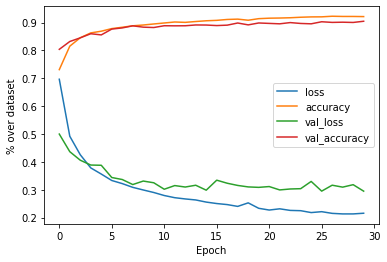

In [8]:
metircs_df = pd.DataFrame(history.history)
metircs_df.plot.line()
plt.xlabel('Epoch')
plt.ylabel('% over dataset')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


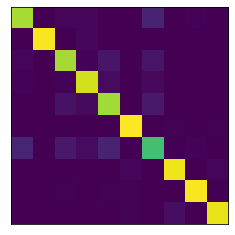

In [9]:
from sklearn.metrics import confusion_matrix

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted = model.predict_classes(x_test.reshape(-1, 28, 28, 1))

matrix = confusion_matrix(y_test, predicted)

plt.imshow(matrix);
plt.xticks([])
plt.yticks([])
plt.show()

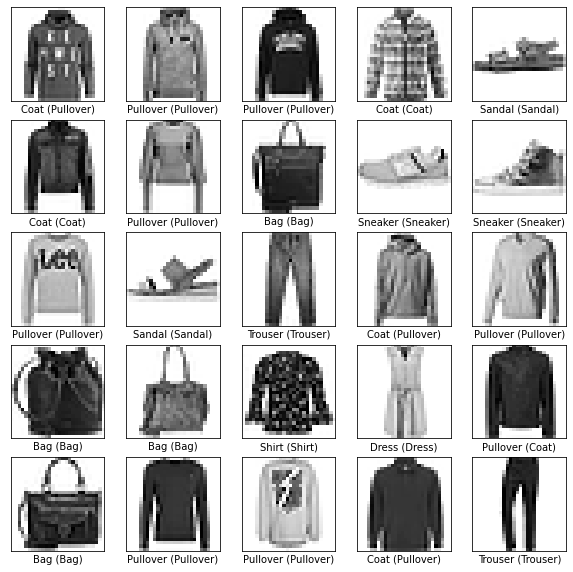

In [10]:
sample_idx = np.random.randint(10000, size=25)

sample_x = x_test[sample_idx]
sample_y = y_test[sample_idx]
predicted = predicted[sample_idx]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample_x[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'{class_names[predicted[i]]} ({class_names[sample_y[i]]})')
plt.show()